
**Dataset collection:**

1. Mount your drive
2. Upload your kaggle.json file (Download your Kaggle API token to get kaggle.json file)
3. Download the dataset (Here, you will get the dataset as imagenet.zip)
4. Unzip the downloaded dataset

The above mentioned procedures are given as a code below

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Select you account, and give continue. You will be able to see the drive mounted

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ # Setting up the working directory. (Optional)

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Upload the download kaggle.json from your device
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [ ]:
!kaggle datasets download -d ambityga/imagenet100 #downloading the dataset from kaggle as imagenet100.zip

Dataset URL: https://www.kaggle.com/datasets/ambityga/imagenet100
License(s): unknown
100% 16.1G/16.1G [02:58<00:00, 161MB/s]
100% 16.1G/16.1G [02:58<00:00, 97.0MB/s]


In [ ]:
!unzip imagenet100.zip # Unzipping the imagenet100.zip file

Streaming output truncated to the last 5000 lines.
  inflating: val.X/n01440764/ILSVRC2012_val_00000293.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00002138.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00003014.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00006697.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00007197.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00009111.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00009191.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00009346.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00009379.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00009396.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00010306.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00011233.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00011993.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00012503.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00013716.JPEG  
  inflating: val.X/n01440764/ILSVRC2012_val_00016

**Installing the dependencies or setting up the environment**

1. Create a venv, for e.g. python -m venv imagenet_vnv
2. Install the below specified libraries/packages.


---



In [ ]:
# Installing the dependencies

!pip install tensorflow
!pip install tqdm
!pip install numpy
!pip install scikit-learn
!pip install keras
!pip install pandas
!pip install opencv-python
!pip install shap
!pip install matplotlib
!pip install -U efficientnet

In [ ]:
#Importing the libraries

import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

<ipython-input-4-36398ed231ac>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


**Data preparation**

1. We see that our train dataset with a total of 100 classes is given in 4 different folders (train.X1, train.X2, train.x3, train.X4) with each containing 25 classes.
2. We consider the first, train.X1 folder to train in here. Therefore, we have 25 classes in the training dataset each with 1300 images
3.  In Val.X, we have all 100 classes(100 folders), which is compared with train.X1 folders and the folders in val.x with same name as the ones in train.X1 are pushed to a newly created directory, '/val'

In [ ]:
import shutil
for label in os.listdir('/content/val.X'):
    if label in os.listdir('/content/train.X1'):
      label_x=label
      os.makedirs(f'/content/val/{label_x}')
      print('dir created')
      for filename in os.listdir(f'/content/val.X/{label_x}'):
          shutil.copy(f'/content/val.X/{label_x}/{filename}', f'/content/val/{label_x}/{filename}')

dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created
dir created


Creation of New Labels.json file

We need to create a new json file, that maps only 25 folders to 25 classes.

In [ ]:
import os
import json

# Set the path to the directory containing the folders
directory_path = "/path/to/directory"

# Set the path to the existing JSON file
existing_json_file = "/path/to/existing.json"

# Load the existing JSON data
try:
    with open(existing_json_file, "r") as f:
        existing_data = json.load(f)
except (FileNotFoundError, json.JSONDecodeError):
    existing_data = {}

# Create a new dictionary to store the updated folder mappings
folder_dict = {}

# Loop through the folders in the directory
for folder_name in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder_name)
    if os.path.isdir(folder_path):
        # Add the folder name to the dictionary with the value 'class'
        folder_dict[folder_name] = 'class'

        # If the folder exists in the existing data, preserve its value
        if folder_name in existing_data:
            folder_dict[folder_name] = existing_data[folder_name]

# Create a new JSON file with the updated folder mappings
new_json_file = "/path/to/new.json"
with open(new_json_file, "w") as f:
    json.dump(folder_dict, f, indent=4)

print(f"New JSON file created: {new_json_file}")

**Training the data**

Here, the ImageDataGenerator() function is generally used for data augmentation.
As the next step, we are generating train data and test data from the train.X1 and Val.X1 directory respectively.

Parameters specified:
1. Batch size = 32 (No.of batches/samples propagating through the network during every epoch/iteration)
2. Class mode = Categorical (We have about 100 classes in total. But, we are using 25 classes)
3. target_size(128,128) (It reduces storage. It makes machine learning algorithms computationally efficient.)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/train.X1",batch_size=32,class_mode= "categorical",target_size=(128,128))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/val", batch_size=32, class_mode= "categorical",target_size=(128,128))

Found 32500 images belonging to 25 classes.
Found 1250 images belonging to 25 classes.


Here, the dataset is trained using 3 different models, such as:
1. VGG16
2. Inceptionv3
3. ResNet50
4. MobileNet

The 'choose_model' variable can be changed to utilize the above mentioned architecture to train the dataset.


The chosen model is 'VGG16'.

Intuition behond chosinf VGG16:

The VGG-16 model is a convolutional neural network (CNN) architecture. It is characterized by its depth, consisting of 16 layers, including 13 convolutional layers and 3 fully connected layers. VGG-16 is renowned for its simplicity and effectiveness, as well as its ability to achieve strong performance on various computer vision tasks, including image classification and object recognition. The model’s architecture features a stack of convolutional layers followed by max-pooling layers, with progressively increasing depth. This design enables the model to learn intricate hierarchical representations of visual features, leading to robust and accurate predictions. Despite its simplicity compared to more recent architectures, VGG-16 remains a popular choice for many deep learning applications due to its versatility and excellent performance.



In [ ]:
import tensorflow

choose_model = 'VGG16'

if choose_model == 'VGG16':
  from tensorflow.keras.applications.vgg16 import VGG16

  base_model = VGG16(input_shape = (128, 128, 3), # Shape of our images
  include_top = False, # Leave out the last fully connected layer
  weights = 'imagenet')

elif choose_model == 'Inceptionv3':
  from tensorflow.keras.applications.inception_v3 import InceptionV3

  base_model = InceptionV3(input_shape = (128, 128, 3),
                          include_top = False,
                          weights = 'imagenet')

elif choose_model == 'ResNet50':
  from tensorflow.keras.applications import ResNet50

  base_model = InceptionV3(input_shape = (128, 128, 3),
                          include_top = False,
                          weights = 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


Here's the architecture of VGG16:

1. The Input dimensions: (224, 224, 3)

2. Convolutional Layers (64 filters, 3×3 filters, same padding):
Two consecutive convolutional layers with 64 filters each and a filter size of 3×3. Same padding is applied to maintain spatial dimensions.

3. Max Pooling Layer (2×2, stride 2):
Max-pooling layer with a pool size of 2×2 and a stride of 2.

4. Convolutional Layers (128 filters, 3×3 filters, same padding):
Two consecutive convolutional layers with 128 filters each and a filter size of 3×3.

5. Max Pooling Layer (2×2, stride 2):
Max-pooling layer with a pool size of 2×2 and a stride of 2.

6. Convolutional Layers (256 filters, 3×3 filters, same padding):
Two consecutive convolutional layers with 256 filters each and a filter size of 3×3.

7. Convolutional Layers (512 filters, 3×3 filters, same padding):
Two sets of three consecutive convolutional layers with 512 filters each and a filter size of 3×3.

8. Max Pooling Layer (2×2, stride 2):
Max-pooling layer with a pool size of 2×2 and a stride of 2.

9. Stack of Convolutional Layers and Max Pooling:
Two additional convolutional layers after the previous stack.
Filter size: 3×3.

10. Flattening:
Flatten the output feature map (7x7x512) into a vector of size 25088.

11. Fully Connected Layers:
Three fully connected layers with ReLU activation.
First layer with input size 25088 and output size 4096.
Second layer with input size 4096 and output size 4096.
Third layer with input size 4096 and output size 1000, corresponding to the 1000 classes in the ILSVRC challenge.
Softmax activation is applied to the output of the third fully connected layer for classification.
This architecture follows the specifications provided, including the use of ReLU activation function and the final fully connected layer outputting probabilities for 1000 classes using softmax activation

Since, we don’t have to train all the layers, we make them non_trainable:

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

The fully connected layers are as follows:
1. The flatten layer serves the purpose of reshaping the output of the preceding layer into a one-dimensional vector, which can then be fed into subsequent fully connected layers
2. A dense layer is a layer where each neuron is connected to every neuron in the previous layer. In other words, the output of each neuron in a dense layer is computed as a weighted sum of the inputs from all the neurons in the previous layer. Here, we have 1024 neurons/units present in the dense layer.
3. The Dropout Layer. Another typical characteristic of CNNs is a Dropout layer. The Dropout layer is a mask that nullifies the contribution of some neurons towards the next layer and leaves unmodified all others. Here we dropout 0.5 units.
4. Finally the output layer with 25 neurons specifying 25 classes.

Parameters used:
1. Optimizer - Adam
2. Learning rate = 0.001
3. Metrics = Accuracy

We will then build the last fully-connected layer. I have just used the basic settings, but feel free to experiment with different values of dropout, and different Optimisers, activation functions and learning rate.

In [ ]:
x = Flatten()(base_model.output)

# Add a fully connected layer with 1024 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x) # Different activation functions can also be used

# Add a dropout rate of 0.5
x = Dropout(0.5)(x) #The dropout values can be changed and experimented

# Add a final sigmoid layer with 25 node for classification output
x = Dense(25, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

'''Note different optimizers can be used, for e.g. Adam, RMSprop, SGD. The learning rate can also be varied (0.1,0.01,0.001,0.25,0.025 etc...).
Trial and error method has to be performed to check which gived good accuracy and losses. Hyperparameter finetuning can also be integrated to detect the best
parameters, e.g. gridsearchcv'''

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

Now, we are training the dataset. Epoch given here is '2'. To improve the performance of the model, the epoch can be increased to 50, 100 based on the dataset. But one must always ensure that the model is not getting overfit.

Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error. Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit. Early stopping rules have been employed in many different machine learning methods, with varying amounts of theoretical foundation. Here, early stopping monitors the validation accuracy. whenever a continuous decrease in val_acc is noted. the model stops traing further to prevent overfitting.

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("Model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata, validation_data= testdata,epochs=2,callbacks=[checkpoint,early])

Epoch 1/2
1016/1016 [==============================] - ETA: 0s - loss: 5.2305 - acc: 0.5260
Epoch 1: val_acc improved from -inf to 0.62400, saving model to Model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1016/1016 [==============================] - 6550s 6s/step - loss: 5.2305 - acc: 0.5260 - val_loss: 1.9165 - val_acc: 0.6240
Epoch 2/2
1016/1016 [==============================] - ETA: 0s - loss: 2.2002 - acc: 0.6369
Epoch 2: val_acc improved from 0.62400 to 0.65840, saving model to Model.h5
1016/1016 [==============================] - 6414s 6s/step - loss: 2.2002 - acc: 0.6369 - val_loss: 1.9870 - val_acc: 0.6584


Results:

Training loss - Significant decrease from 5.23 to 2.20
Training accuracy - Significant increase from 0.52 to 0.63
Validation loss - Increase in validation loss by about 0.07 approximately
Validation accuracy - Increase from 0.62 to 0.65

Therefore by using vgg16, we have achieved pretty good accuracy in just 2 epochs. The accuracy will increase more, as we increase the number of epochs

**Evaluation Metrics**

The graph clearly showns significant decrease in training loss. Increase in training accuracy and validation accuracy. A slight increase in validation losses are observed too.



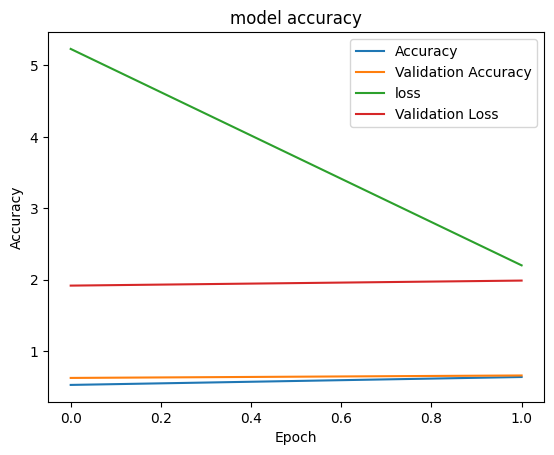

In [ ]:
#Graph to check loss and accuracy

import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Classification report is generated which shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. This report shoes class 21 with highest precision score, class 13 with highest recall score and class 21 with highest F1 score.

In [ ]:
# Precision, recall, f1 score
Y_pred = model.predict(testdata, testdata.samples / 32)
val_preds = np.argmax(Y_pred, axis=1)
import sklearn.metrics as metrics
val_trues =testdata.classes
from sklearn.metrics import classification_report
print(classification_report(val_trues, val_preds))

40/40 [==============================] - 280s 7s/step
              precision    recall  f1-score   support

           0       0.02      0.04      0.03        50
           1       0.02      0.02      0.02        50
           2       0.06      0.06      0.06        50
           3       0.03      0.02      0.02        50
           4       0.05      0.02      0.03        50
           5       0.05      0.06      0.05        50
           6       0.05      0.04      0.04        50
           7       0.04      0.04      0.04        50
           8       0.00      0.00      0.00        50
           9       0.02      0.02      0.02        50
          10       0.05      0.06      0.06        50
          11       0.08      0.08      0.08        50
          12       0.04      0.04      0.04        50
          13       0.07      0.12      0.08        50
          14       0.06      0.06      0.06        50
          15       0.02      0.02      0.02        50
          16       0.03    

In a multiclass confusion matrix, the concept of "positive" and "negative" classes from binary classification is replaced with the individual classes of the problem.

Instead, in a multiclass confusion matrix, we count the class each element is predicted to belong to (columns) depending on its true class (rows). This way, in the diagonal, you find the elements that were correctly classified (predicted class matches true class) while in the non-diagonal elements, you see the number of misclassified elements. The higher the counts in the diagonal, the better your classifier is. If we look at the columns, we can see, for each predicted class, what the actual true classes were. If we look at the rows, we can see, for each true class, what the predicted classe

In [ ]:
# Confusion matrix

Y_pred = model.predict(testdata, testdata.samples / 32)
val_preds = np.argmax(Y_pred, axis=1)
val_trues =testdata.classes
cm = metrics.confusion_matrix(val_trues, val_preds)
cm

40/40 [==============================] - 244s 6s/step


array([[2, 1, 5, 1, 2, 2, 0, 2, 0, 5, 3, 3, 1, 5, 0, 2, 1, 3, 4, 2, 2, 0,
        1, 2, 1],
       [2, 2, 1, 1, 1, 3, 2, 3, 3, 1, 3, 3, 4, 5, 1, 1, 1, 2, 2, 3, 2, 2,
        0, 0, 2],
       [2, 0, 4, 3, 0, 5, 1, 2, 2, 3, 3, 2, 1, 1, 0, 2, 3, 3, 2, 2, 1, 5,
        1, 1, 1],
       [0, 2, 3, 2, 2, 2, 2, 1, 1, 1, 5, 1, 2, 5, 2, 3, 2, 0, 2, 2, 3, 0,
        1, 2, 4],
       [3, 2, 2, 2, 2, 3, 5, 1, 1, 1, 2, 2, 0, 7, 1, 1, 1, 1, 3, 3, 0, 0,
        4, 2, 1],
       [5, 2, 3, 0, 1, 2, 2, 1, 2, 3, 1, 1, 4, 4, 4, 1, 3, 1, 2, 0, 2, 1,
        1, 1, 3],
       [2, 1, 2, 1, 3, 1, 3, 2, 1, 2, 3, 1, 3, 2, 2, 3, 2, 3, 3, 1, 1, 2,
        1, 0, 5],
       [2, 4, 1, 0, 0, 1, 3, 2, 0, 2, 3, 4, 2, 6, 2, 1, 1, 0, 1, 2, 1, 2,
        4, 3, 3],
       [1, 5, 3, 1, 0, 5, 1, 2, 2, 2, 2, 3, 2, 4, 1, 0, 1, 1, 4, 2, 3, 2,
        2, 1, 0],
       [3, 2, 2, 1, 0, 1, 2, 2, 1, 0, 4, 3, 2, 5, 2, 3, 0, 4, 1, 3, 4, 2,
        1, 0, 2],
       [6, 0, 0, 1, 2, 3, 0, 3, 2, 1, 2, 3, 1, 2, 1, 1, 0, 6, 2, 1, 2, 4,
      

**Saving the model**


In [ ]:
model.save('vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Prediction using new image**

In [ ]:
#create new file test.py and run this file
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
#load saved model
model = load_model("Model.h5") # or model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(128, 128, 3))
img_path = '/path/to/input_image.jpg' # Path to input image
img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels=[]
f = open('Labels.json')
data = json.load(f)
for dir in glob.glob('/content/Val/*'):
  label = dir.split('/')[-1]
  class_labels.append(data[label])
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(class_labels[pred[0]])

**SHAP Values generation**

It helps in identifying how features led to the particular classification.It helps in determining the contribution of features in classifying the data. This is one among the feature to enhance our model during deployment. Since, we will be able to inform the clients/users regarding how the model arrived at a particular classification/prediction.

1/1 [==============================] - 1s 526ms/step
Prediction for /content/val/n01440764/ILSVRC2012_val_00000293.JPEG: goldfinch, Carduelis carduelis (68.70%)


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [01:41, 101.74s/it]              


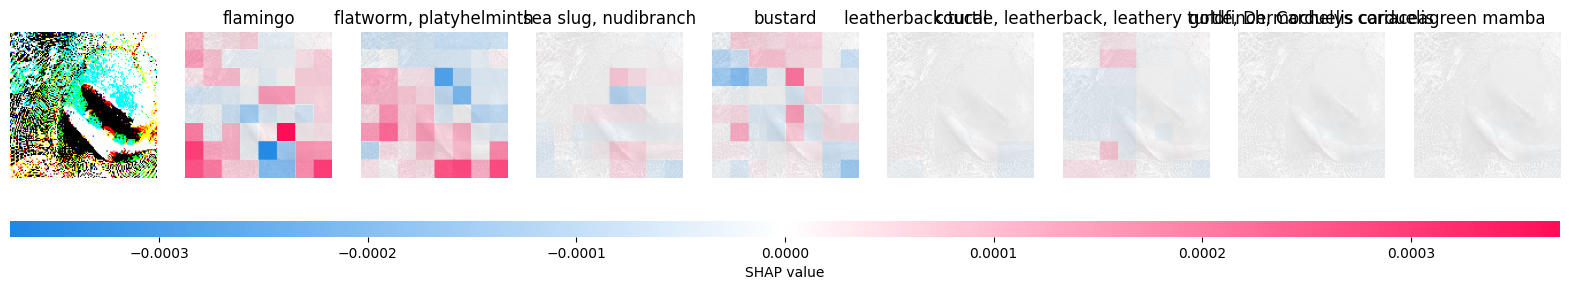

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model


class_labels=[]
f = open('Labels.json')
data = json.load(f)
for dir in glob.glob('/content/val/*'):
  label = dir.split('/')[-1]
  class_labels.append(data[label])

# Load the pre-trained model
model = load_model('Model.h5')

# Define a function to preprocess the images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(128, 128))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Single image implementation
image_path = '/content/val/n01440764/ILSVRC2012_val_00000293.JPEG'
image = preprocess_image(image_path)

predictions = model.predict(image)
predicted_class_index = np.argmax(predictions)
confidence = predictions[0, predicted_class_index]
predicted_class_name = class_labels[predicted_class_index]
print(f"Prediction for {image_path}: {predicted_class_name} ({confidence * 100:.2f}%)")


# Create a masker object for the PartitionExplainer
masker = shap.maskers.Image("inpaint_telea", image[0].shape)

# Compute SHAP values using PartitionExplainer
explainer = shap.Explainer(model, masker,output_names=class_labels)
shap_values = explainer(
    image, max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:8]
)
shap.image_plot(shap_values)

# Images in folder implementation

# folder_path = 'path/to/folder'
# for i in os.listdir(folder_path):
#   image_path = f'path/to/folder/{i}'
#   image_path = '/content/val/n01440764/ILSVRC2012_val_00000293.JPEG'
#   image = preprocess_image(image_path)

#   predictions = model.predict(image)
#   predicted_class_index = np.argmax(predictions)
#   confidence = predictions[0, predicted_class_index]
#   predicted_class_name = class_labels[predicted_class_index]
#   print(f"Prediction for {image_path}: {predicted_class_name} ({confidence * 100:.2f}%)")


#   # Create a masker object for the PartitionExplainer
#   masker = shap.maskers.Image("inpaint_telea", image[0].shape)

#   # Compute SHAP values using PartitionExplainer
#   explainer = shap.Explainer(model, masker,output_names=class_labels)
#   shap_values = explainer(
#       image, max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
#   )
#   shap.image_plot(shap_values)





**Post Model Quantization**

Model quantization is vital for deploying large AI models on resource-constrained devices. Quantization levels, like 8-bit or 16-bit, reduce model size and improve efficiency.

In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('vgg16.h5')

# Initialize the TFLiteConverter with the Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model to TensorFlow Lite format
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print('completed')

completed
